<h1 align="center">Volume 4: Shooting Method.</h1>

    Bryant McArthur
    Section #
    January 26, 2023

In [1]:
from scipy.integrate import solve_ivp
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def secant_method(h, s0, s1, max_iter=100, tol=1e-8):
    """
    Finds a root of h(s)=0 using the secant method with the
    initial guesses s0, s1.
    """
    for i in range(max_iter):
        # Get the residuals
        h0 = h(s0)
        h1 = h(s1)
        # Update
        s2 = s1 - h1 * (s1 - s0)/(h1 - h0)
        s0, s1 = s1, s2
        
        # Check convergence
        if abs(h1) < tol:
            return s2
    
    print("Secant method did not converge")
    return s2

# Problem 1

Appropriately defined initial value problems will usually have a unique solution.
Boundary value problems are not so straightforward; they may have no solution or they may have several, and you may have to determine which solutions are physically interesting.

Use the secant method to solve the following BVP:
\begin{equation*}
\begin{split}
y'' &= -e^{y-1}, \quad x \in [0,1],\\
y(0) &=y(1) =1.
\end{split}
\end{equation*}
This BVP has two solutions.
Using the secant method, find both numerical solutions and their initial slopes.
What initial values $s_0, s_1$ did you use to find them?

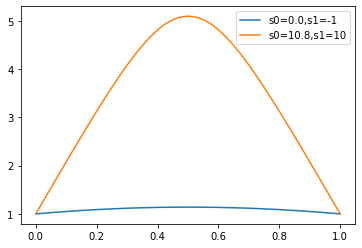

In [3]:
# Initialize everything
def ode(x,y):
    return np.array([y[1], -np.exp(y[0]-1)])

a = 0
b = 1
alpha = 1
beta = 1

def residual(s):
    sol = solve_ivp(ode, (a,b), [alpha,s])
    yb = sol.y[0,-1]
    return yb - beta

# Call secant method
s = secant_method(residual, (beta-alpha)/2, -1)

x = np.linspace(0,1,100)
y = solve_ivp(ode, (a,b), (alpha,s), t_eval=x).y[0]

# Plot it
plt.plot(x,y, label=f"s0={(beta-alpha)/2},s1=-1")
s = secant_method(residual,10.8,10)
x = np.linspace(0,1,100)
y = solve_ivp(ode, (a,b), (alpha,s), t_eval=x).y[0]

plt.plot(x,y, label=f"s0=10.8,s1=10")
plt.legend()
plt.show()

# Problem 2

Use Newton's method to solve the BVP
\begin{align*}
y'' &= 3 + \frac{2y}{x^2}, \,\, x \in [1,e],\\
y(1) &= 6, \\
y(e) &= e^2 + 6/e
\end{align*}
Plot your solution.

In [4]:
def newtons_method(h, z, s0, max_iter=100, tol=1e-8):
    """
    Finds a root of h(s)=0 using the newtons method with the
    initial guesses s0.
    """
    for i in range(max_iter):
        # Get the residuals
        h0 = h(s0)
        
        # Update
        s1 = s0 - h0/z(s0)
        s0 = s1
        
        # Check convergence
        if abs(h0) < tol:
            return s1
        
    print("Newtons method did not converge")
    return s1

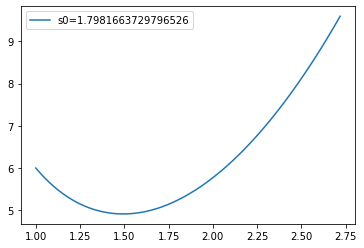

An appropriate initial guess is anywhere on domain because it is convex.


In [5]:
# Define odes
def y_ode(x,y):
    return np.array([y[1], 3+(2*y[0]/x**2)])
def z_ode(x,y):
    return np.array([y[1], 2*y[0]/x**2])

# boundaries
a = 1
b = np.exp(1)
alpha = 6
beta = np.exp(2)+6/np.exp(1)

# Residuals
def residual(s):
    sol = solve_ivp(y_ode, (a,b), [alpha,s])
    yb = sol.y[0,-1]
    return yb - beta

def z(s):
    sol = solve_ivp(z_ode, (a,b), [0,1])
    yb = sol.y[0,-1]
    return yb
    
# Call newton's method
n = newtons_method(residual, z, (beta-alpha)/2)

x = np.linspace(a,b,100)
y = solve_ivp(y_ode, (a,b), (alpha,n), t_eval=x).y[0]

# Plot it
plt.plot(x,y, label=f"s0={(beta-alpha)/2}")
plt.legend()
plt.show()
print("An appropriate initial guess is anywhere on domain because it is convex.")

# Problem 3

Suppose we have a cannon that fires a projectile at a velocity of $45\text{ m/s}$, and the projectile has a mass of about $60$ kg, so that $\mu = .0003$.
At what angle $\theta(0)$ should it be fired to land at a distance of $195\text{ m}$?
Use the secant method to find initial values for $\theta$ that give solutions to the following BVP:
\begin{align}
	\begin{split}
\frac{dy}{dx} &= \tan {\theta} ,\\
\frac{dv}{dx} &= -\frac{g \sin{\theta} + \mu v^2}{v \cos{\theta}},\\
\frac{d\theta}{dx} &= -\frac{g}{v^2},\\
y(0)&= y(195) = 0,\\
v(0) &= 45 \text{ m/s}
	\end{split}
\end{align}
($g = 9.8067\text{ m/s}^2$.)

There are four initial angles $\theta(0)$ that produce solutions for this BVP when $\mu = 0.0003$.
Find and plot at least two of them.
Also find the two solutions when $\mu = 0$ (no air resistance), and compare.

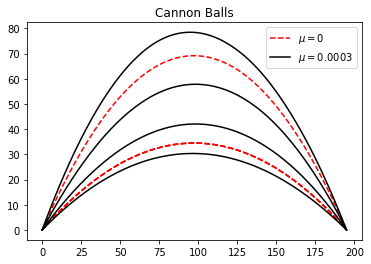

In [20]:
# Initialize everything
v0 = 45
m = 60
mu = .0003
a = 0
b = 195
alpha = 0
beta = 0
g = 9.8067

# Define ode
def ode(x, y):
    """
    y[0] = y
    y[1] = velocity
    y[2] = theta
    returns y,v,theta
    """
    return np.array([np.tan(y[2]), -(g*np.sin(y[2]) + mu*y[1]**2)/(y[1]*np.cos(y[2])), -g/y[1]**2])

# Define residual
def residual(s):
    sol = solve_ivp(ode, (a,b), [alpha,v0,s])
    yb = sol.y[0,-1]
    return yb - beta
    
# Iterate through mus and plot guesses
for mu in [0,.0003]:
    s = secant_method(residual, 0,1)
    x = np.linspace(0,195,1000)
    y = solve_ivp(ode, (a,b), (alpha,v0,s), t_eval=x).y[0]
    plt.plot(x,y, "k-" if mu==.0003 else "r--", label=f"$\mu={mu}$")
    
    s = secant_method(residual, (beta-alpha)/2, -1)
    x = np.linspace(0,195,1000)
    y = solve_ivp(ode, (a,b), (alpha,v0,s), t_eval=x).y[0]
    plt.plot(x,y, "k-" if mu==.0003 else "r--")
    
    s = secant_method(residual, 10.8, 10)
    x = np.linspace(0,195,1000)
    y = solve_ivp(ode, (a,b), (alpha,v0,s), t_eval=x).y[0]
    plt.plot(x,y, "k-" if mu==.0003 else "r--")
    
    s = secant_method(residual, 1,6)
    x = np.linspace(0,195,1000)
    y = solve_ivp(ode, (a,b), (alpha,v0,s), t_eval=x).y[0]
    plt.plot(x,y, "k-" if mu==.0003 else "r--")
    
    
plt.title("Cannon Balls")
plt.legend()
plt.show()